In [25]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
albucore                  0.0.12
albumentations            1.4.10
annotated-types           0.7.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.6.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
coloredlogs               15.0.1
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
fastjsonschema            2.20.0
filelock       


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import cv2
import json
import matplotlib.pyplot as plt

In [2]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [3]:
train_images=tf.data.Dataset.list_files('aug_data/train/images/*.JPG',shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)


In [4]:
val_images=tf.data.Dataset.list_files('aug_data/valid/images/*.JPG',shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)


In [5]:
for image in val_images:
    if image.shape!=(120,120,3):
        print('false')
        break

In [6]:
def load_labels(x):
    label_file = x.numpy().decode("utf-8")
    with open(label_file, "r") as f:
        my_json_object = json.load(f)
        label = my_json_object["class"].lower()
        if label == "thirty":
            return tf.constant([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "fifty":
            return tf.constant([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "children":
            return tf.constant([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "left_turning":
            return tf.constant([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "no_entry":
            return tf.constant([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "no_horn":
            return tf.constant([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "no_parking":
            return tf.constant([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "no_stopping":
            return tf.constant([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "right_turning":
            return tf.constant([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0], dtype=tf.float32)
        elif label == "slope":
            return tf.constant([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0], dtype=tf.float32)
        elif label == "straight_or_left":
            return tf.constant([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0], dtype=tf.float32)
        elif label == "straight_or_right":
            return tf.constant([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0], dtype=tf.float32)
        elif label == "uturn":
            return tf.constant([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0], dtype=tf.float32)
        elif label == "zebra":
            return tf.constant([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0], dtype=tf.float32)
        elif label == "no_sign":
            return tf.constant([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1], dtype=tf.float32)
        



In [7]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels=train_labels.map(lambda x :tf.py_function(load_labels,[x],tf.float32))

In [8]:
for elements in train_labels.take(1):
    print(elements)

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(15,), dtype=float32)


In [9]:
for labels in train_labels:
    if labels.shape!=(15,):
        print('false')
        break

In [10]:
val_labels = tf.data.Dataset.list_files('aug_data/valid/labels/*.json', shuffle=False)
val_labels=val_labels.map(lambda x :tf.py_function(load_labels,[x],tf.float32))

In [11]:
len(train_images)

16770

In [12]:
len(train_labels)

16770

In [13]:
len(val_images)

3630

In [14]:
len(val_labels)

3630

In [15]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(64)
train = train.prefetch(32)

In [16]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(64)
val = val.prefetch(32)

<class 'tuple'>
tf.Tensor(
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0.

ValueError: num must be an integer with 1 <= num <= 32, not 33

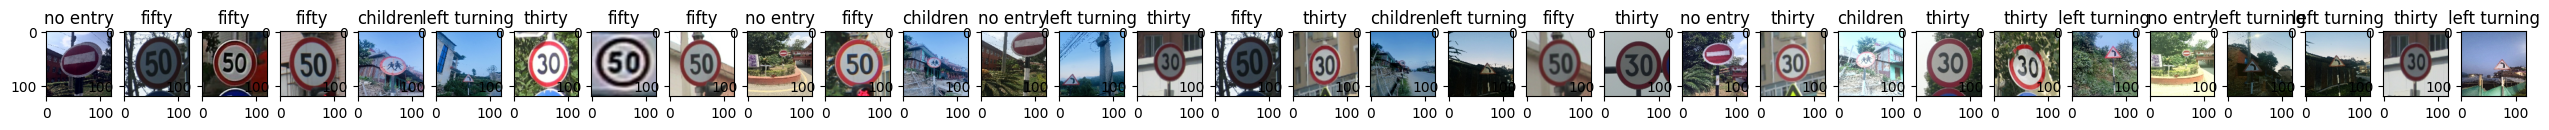

In [27]:
import numpy as np

plt.figure(figsize=(32, 4))
for element in train.take(1):
    print(type(element))
    print(element[1])
    print(element[1][0])
    #element [0] vitra 8 oota image xan
    #aani element[1] vitra 8 labels xan
    #print(element[0][0])
    #print(type(element[0]))
    #prefetch le garda ho ki jati choti run garayo tei change vai rado raixa
    for i, (my_image, label) in enumerate(zip(element[0], element[1])):
        plt.subplot(1, 32, i + 1)  # Create subplots for each image
        plt.imshow(my_image)
        if np.array_equal(label, [1, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0]):
            plt.title("thirty")
        elif np.array_equal(label, [0, 1, 0,0,0,0,0,0,0,0,0,0,0,0,0]):
            plt.title("fifty")
        elif np.array_equal(label, [0, 0, 1,0,0,0,0,0,0,0,0,0,0,0,0]):
            plt.title("children")
        elif np.array_equal(label, [0, 0, 0,1,0,0,0,0,0,0,0,0,0,0,0]):
            plt.title("left turning")
        elif np.array_equal(label, [0, 0, 0,0,1,0,0,0,0,0,0,0,0,0,0]):
            plt.title("no entry")
        elif np.array_equal(label, [0, 0, 0,0,0,1,0,0,0,0,0,0,0,0,0]):
            plt.title("no horn ")
        elif np.array_equal(label, [0, 0, 0,0,0,0,1,0,0,0,0,0,0,0,0]):
            plt.title("no parking")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,1,0,0,0,0,0,0,0]):
            plt.title("no stopping")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,1,0,0,0,0,0,0]):
            plt.title("right turning")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,1,0,0,0,0,0]):
            plt.title("slope")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,0,1,0,0,0,0]):
            plt.title("straight or left")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,0,0,1,0,0,0]):
            plt.title("straight or right")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,0,0,0,1,0,0]):
            plt.title("uturn")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,0,0,0,0,1,0]):
            plt.title("zebra")
        elif np.array_equal(label, [0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,1]):
            plt.title("no_sign")
        

    plt.show()


In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,InputLayer,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

vgg_base = VGG16(include_top=False, input_shape=(120, 120, 3))

# Freeze the VGG16 base model
vgg_base.trainable = False


model1=tf.keras.Sequential([
    InputLayer((120,120,3)),
    vgg_base,
    GlobalMaxPooling2D(),











    Dense(2048,activation="relu"),
    Dropout(0.5),



    Dense(15,activation="softmax")
])


model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │          30,735 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,796,047 (60.26 MB)

 Trainable params: 1,081,359 (4.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy




In [19]:
optimizer = Adam(learning_rate=0.0001)

In [20]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001),
               loss=CategoricalCrossentropy(),
               metrics=['accuracy'],run_eagerly=True)


In [22]:
history=model1.fit(train,validation_data=val,epochs=20,verbose=1)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1651s 6s/step - accuracy: 0.5960 - loss: 1.4098 - val_accuracy: 0.7970 - val_loss: 0.7214
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1407s 5s/step - accuracy: 0.9295 - loss: 0.3188 - val_accuracy: 0.8815 - val_loss: 0.4358
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1391s 5s/step - accuracy: 0.9788 - loss: 0.1445 - val_accuracy: 0.9157 - val_loss: 0.3229
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1581s 6s/step - accuracy: 0.9893 - loss: 0.0825 - val_accuracy: 0.9245 - val_loss: 0.2761
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1587s 6s/step - accuracy: 0.9954 - loss: 0.0502 - val_accuracy: 0.9196 - val_loss: 0.2547
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1634s 6s/step - accuracy: 0.9978 - loss: 0.0343 - val_accuracy: 0.9311 - val_loss: 0.2353
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1704s 6s/step - accuracy: 0.9993 - loss: 0.0226 - val_accuracy: 0.9284 - val_loss: 0.2358
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1693s 6s/step - accuracy: 0.9991 - loss: 0.0175 - 

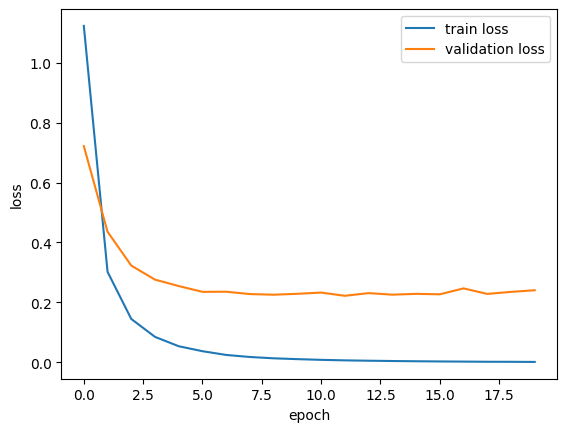

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','validation loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

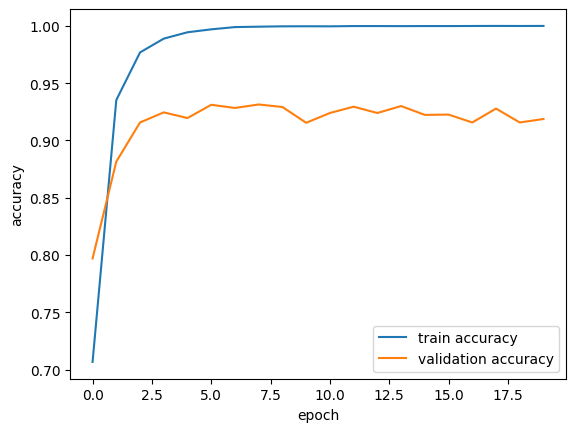

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train accuracy','validation accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [25]:
model1.save('modelone.h5')


In [27]:
model1.save('modelone.keras')